In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [204]:
# cargamos datos
df=pd.read_csv(r'C:\Users\david\Desktop\Curso ML\Pandas\loan_dataset.csv')

In [206]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [208]:
df.shape

(614, 13)

In [210]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [212]:
# manejamos los missing values--> eliminamos los NaN
df=df.dropna()

In [214]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [216]:
# convertimos los valores target (Loan Status) Y y N en valores numéricos 1(Y) y 0(N)
# varias formas:
#df.loc[df['Loan_Status']=='Y', 'Loan_Status']=1 ; df.loc[df['Loan_Status']=='N', 'Loan_Status']=0
df['Loan_Status_n']=df['Loan_Status'].apply(lambda x: 1 if x=='Y' else 0 )
# df[Loan_Status].replace({'N':0,'Y':1}) / df.replace({'Loan_Status':{'N':0,'Y':1}})

In [218]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_n
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,1


In [220]:
# nos fijamos ahora en Dependents
df['Dependents'].value_counts() # el valor 3+ no nos sirve

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [222]:
# cambiamos el valor 3+ por 4 --> Varias formas
#df.loc[df['Dependents']=='3+','Dependents']=4
df= df.replace(to_replace='3+', value=4) #/ df.replace('3+', 4)

In [224]:
df['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

In [226]:
# Visualización de datos

<Axes: xlabel='Education', ylabel='count'>

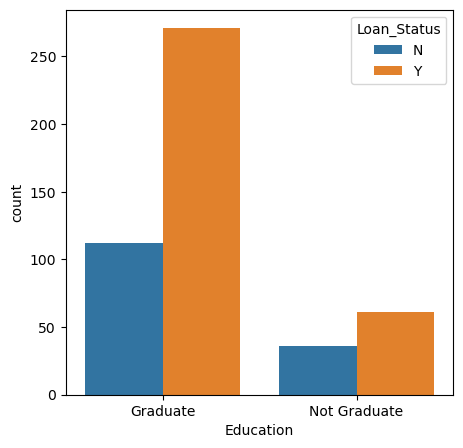

In [228]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='Education',hue='Loan_Status')

<Axes: xlabel='Married', ylabel='count'>

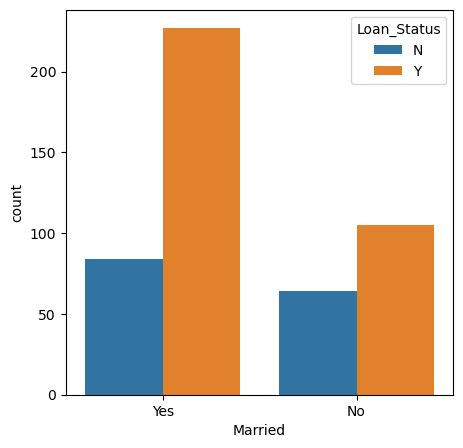

In [230]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='Married',hue='Loan_Status')

<Axes: xlabel='Married', ylabel='count'>

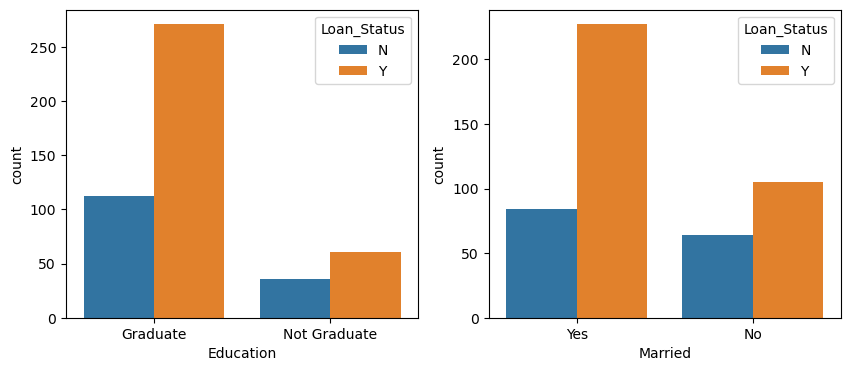

In [232]:
# los puedo juntar en uno solo 
fig, ax=plt.subplots(1,2, figsize=(10,4))
sns.countplot(data=df,x='Education',hue='Loan_Status',ax=ax[0])
sns.countplot(data=df,x='Married',hue='Loan_Status',ax=ax[1])

In [234]:
# hemos visto que algunas columnas tienen valores texto (categoricos)
# debemos cambiarlos por valores numéricos
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
            'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True
          )

C:\Users\david\AppData\Local\Temp\ipykernel_24064\736406290.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},


In [236]:
# eliminamos la columna Loan_Status original
df.drop(columns='Loan_Status',index=1,inplace=True)

In [238]:
df.rename(columns={'Loan_Status_n':'Loan_Status'},inplace=True)

In [240]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
6,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1


In [242]:
# separamos las variables
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1) # la columna Loan_ID tampoco nos sirve
y=df['Loan_Status'] # target

In [244]:
# train test spli
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2,stratify=y)

In [246]:
print(X.shape,X_train.shape,X_test.shape)

(479, 11) (431, 11) (48, 11)


In [180]:
# Entrenamos el modelo

In [248]:
classifier=svm.SVC(kernel='linear') # se trata de un problema de clasificacion. Elegimos este modelo
# El modelo ajusta los datos a un hiperplano. A partir de la posición del hiperplano y la psocion de cada punto respecto al
# hiperplano, realiza su clasificacion cn los vecstores más cercano

In [250]:
# Entrenamos el modelo
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [252]:
# evaluamos el modelo
# X train
X_train_pred=classifier.predict(X_train)
accuracy1=accuracy_score(X_train_pred,y_train)
print(accuracy1)

# X test
X_test_pred=classifier.predict(X_test)
accuracy2=accuracy_score(X_test_pred,y_test)
print(accuracy2)



0.802784222737819
0.75


1 Accuracy similar en train y test

Se considera que el modelo tiene buena generalización o está en un buen ajuste ("good fit")
El modelo ha aprendido correctamente los patrones del entrenamiento y es capaz de aplicarlos a datos nuevos (test) sin sobreajustar ni infraajustar. Es la situación ideal: el modelo no memoriza ni se queda corto, sino que generaliza bien

2 Accuracy mucho mayor en train que en test

Esto se llama overfitting o sobreajuste
El modelo ha memorizado los datos de entrenamiento (muy alta precisión en train), pero no es capaz de generalizar a datos nuevos (baja precisión en test). Suele ocurrir con modelos muy complejos o sin regularización adecuada. El modelo aprende el "ruido" y los detalles específicos del train, pero falla en el test

3 Accuracy bajo en train y en test (ambos bajos y similares)

Esto es underfitting o subajuste
El modelo es demasiado simple o está mal configurado, por lo que no logra aprender ni siquiera los patrones del entrenamiento. Por eso, tampoco generaliza bien en el test. Suele pasar con modelos poco complejos, insuficientemente entrenados o con características poco informativas

In [256]:
# hacemos un sistema de prediccion
data=(1 ,1, 0 ,1 ,1 ,3000 ,0.0 ,66.0 ,360.0 ,1.0 ,2 ) 
data_np=np.asarray(data) # los modelos scikit suelen esperar datos en array numpy
data_np_reshaped=data_np.reshape(1,-1)#Cambia la forma del array para que tenga una fila y tantas columnas como variable de entrada
#Los modelos de machine learning esperan que los datos de entrada para predecir (predict) tengan la forma (n_muestras, n_variables), 
#es decir, una matriz de dos dimensiones, aunque solo tengas una muestra.

In [258]:
classifier.predict(data_np_reshaped)

C:\Users\david\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1], dtype=int64)